# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

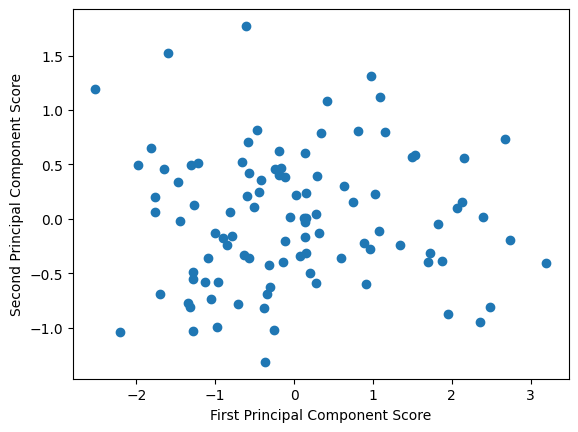

In [81]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

*What can be said about the three outliers in the upper left corner of the graph? Is their first principal component score high or low? What about their second principal component score?*

The three outliers on this graph have a low (negative) value for the first principal component score and a high value for the Second principal component score. This tells us that these data points have a small projection along the direction of maximum variance (PC1), but a larger projection along the direction of the second-highest variance (PC2). In other words, the data has a strong relationship in the PC2 but not much in PC1.


*What does that mean about their values in series_1, series_2, and series_3? It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.*

Due to the large variability in series_3 (as seen by the noise scaling factor of 0.5) we can assume these points have extreme values in the first principal component and are the cause for the outliers. The relationship between series_1 and series_2 is more challenging to interpret in this context because of their high correlation. The strong correlation between series_1 and series_2 means that movements in one will often be reflected in the other. So, changes along the first two principal components can be influenced by both series in similar ways. In addition, PCA is designed to identify orthogonal components, but since series_1 and series_2 are so similar, the first two principal components will likely capture joint variance from both of them. This makes it hard to attribute specific patterns or outliers to just series_1 or series_2.


*Overall, what are the advantages and disadvantages of the graph?  Does it show anything interesting?*

A major advantage of this graph is its outlier detection ability. The plot makes outliers easy to identify which therefore allows for further investigation into the data/those particular points. In addition, this graph simplifies the PCA data; the PCA scatter plot helps to reduce the three dimensions into two, providing a clearer view of the data's structure. Although it helps simplify the data, this is also a disadvantage. By only showing two principal components, there is a loss of information and limits our understanding of the data in its totality (no data shown regarding PC3). In addition, because series_1 and series_2 are highly correlated, it is difficult to determine the  contributions each of them have to the outliers.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [82]:
# Dataset 1: Video_review

import pandas as pd
df_video_review = pd.read_csv('video_review.csv')

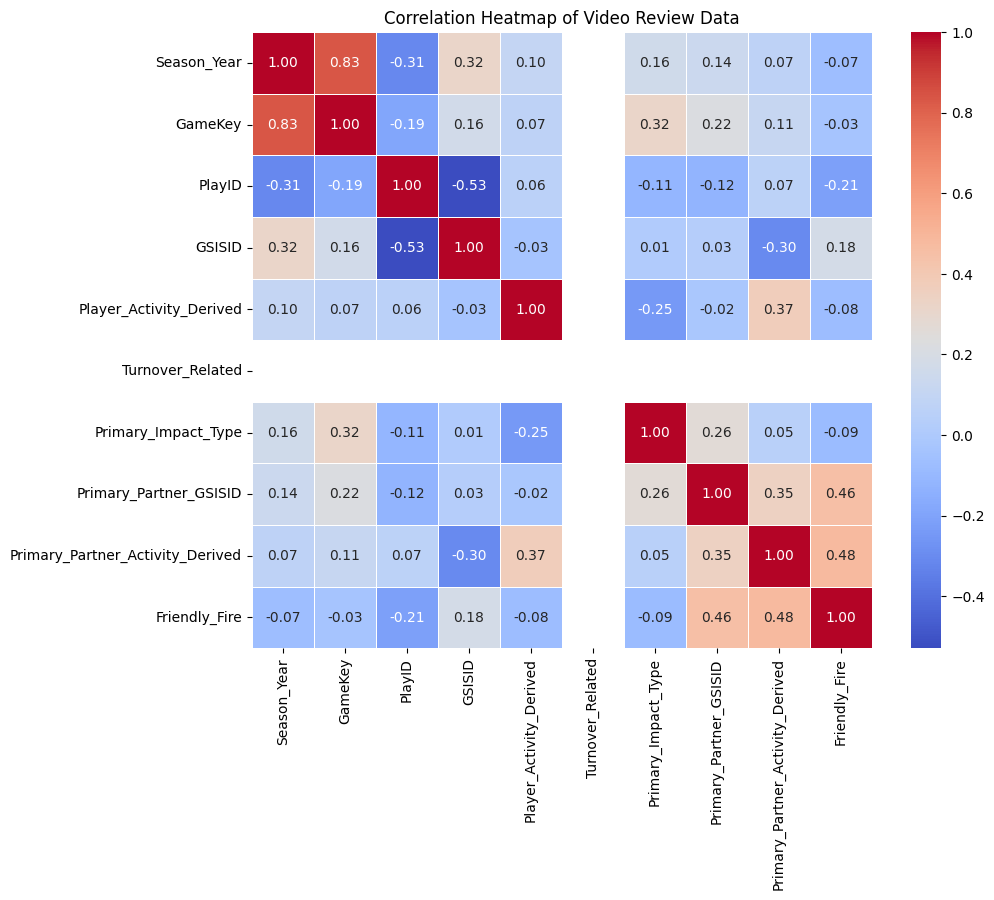

In [83]:
# Heatmap for Video_Review

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df_video_review.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_video_review[col] = le.fit_transform(df_video_review[col])
    label_encoders[col] = le

corr = df_video_review.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Video Review Data")
plt.show()



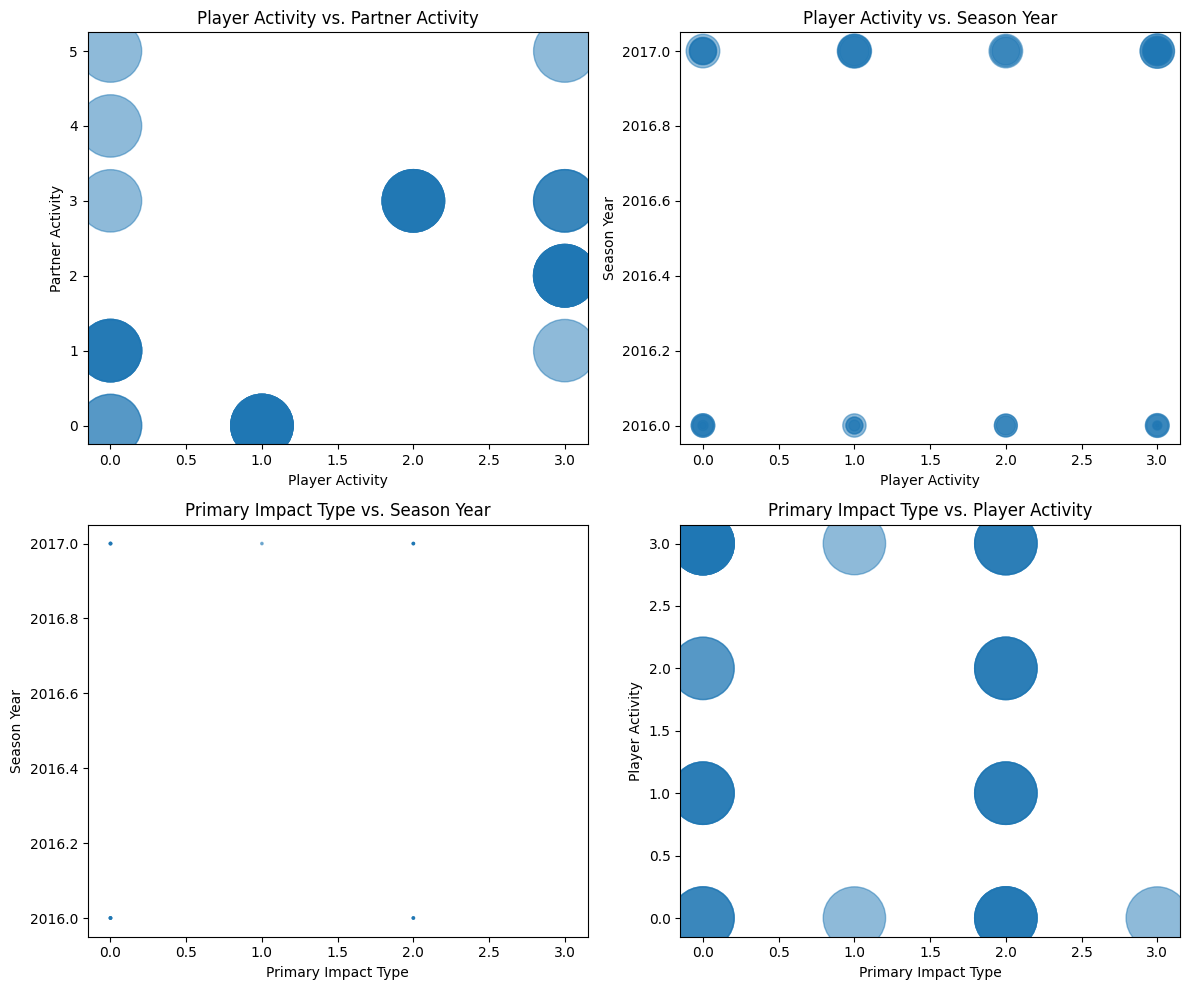

In [84]:
# Bubble Plot for Video_Review
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Player Activity vs. Partner Activity
axs[0, 0].scatter(df_video_review['Player_Activity_Derived'], df_video_review['Primary_Partner_Activity_Derived'],
                  s=df_video_review['Season_Year'], alpha=0.5)
axs[0, 0].set_xlabel('Player Activity')
axs[0, 0].set_ylabel('Partner Activity')
axs[0, 0].set_title('Player Activity vs. Partner Activity')

# Plot 2: Player Activity vs. Season Year
axs[0, 1].scatter(df_video_review['Player_Activity_Derived'], df_video_review['Season_Year'],
                  s=df_video_review['GameKey'], alpha=0.5)
axs[0, 1].set_xlabel('Player Activity')
axs[0, 1].set_ylabel('Season Year')
axs[0, 1].set_title('Player Activity vs. Season Year')

# Plot 3: Primary Impact Type vs. Season Year
axs[1, 0].scatter(df_video_review['Primary_Impact_Type'], df_video_review['Season_Year'],
                  s=df_video_review['Player_Activity_Derived'], alpha=0.5)
axs[1, 0].set_xlabel('Primary Impact Type')
axs[1, 0].set_ylabel('Season Year')
axs[1, 0].set_title('Primary Impact Type vs. Season Year')

# Plot 4: Primary Impact Type vs. Player Activity
axs[1, 1].scatter(df_video_review['Primary_Impact_Type'], df_video_review['Player_Activity_Derived'],
                  s=df_video_review['Season_Year'], alpha=0.5)
axs[1, 1].set_xlabel('Primary Impact Type')
axs[1, 1].set_ylabel('Player Activity')
axs[1, 1].set_title('Primary Impact Type vs. Player Activity')

plt.tight_layout()

plt.show()



In [85]:
# Principal Component Analysis for Video_Review

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns





In [86]:
# Linear regression analysis using different sets of features for Video_Review
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Player Activity vs Partner Activity
X = df_video_review[['Primary_Partner_Activity_Derived']]  
y = df_video_review['Player_Activity_Derived']    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model (Player Activity vs Partner Activity):")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print('-' * 40)


# Player Activity vs Season Year
X = df_video_review[['Season_Year']]
y = df_video_review['Player_Activity_Derived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model (Player Activity vs Season Year):")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print('-' * 40)

# Primary Impact Type vs Season Year
X = df_video_review[['Season_Year']]
y = df_video_review['Primary_Impact_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model (Primary Impact Type vs Season Year):")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print('-' * 40)

# Example: Primary Impact Type vs Player Activity
X = df_video_review[['Player_Activity_Derived']]
y = df_video_review['Primary_Impact_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model (Primary Impact Type vs Player Activity):")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print('-' * 40)



Linear Regression Model (Player Activity vs Partner Activity):
MAE: 0.5081
MSE: 0.5382
R²: 0.4532
----------------------------------------
Linear Regression Model (Player Activity vs Season Year):
MAE: 0.8810
MSE: 1.0777
R²: -0.0948
----------------------------------------
Linear Regression Model (Primary Impact Type vs Season Year):
MAE: 0.8750
MSE: 0.8533
R²: 0.0071
----------------------------------------
Linear Regression Model (Primary Impact Type vs Player Activity):
MAE: 0.9193
MSE: 0.9606
R²: -0.1178
----------------------------------------


Conclusions for Video_Review Dataset:

*Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data! Do you see any outliers? (Data points that are far from the rest of the data). Perform Principal Component Analysis to find out the directions in which the data varies. Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps? Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture? Which features seem most likely to be useful to predict other features?*

I would say the data still is usable for analysis and can offer great insights into the objective at play. In the scatterplot of PC1 vs PC2, the data is very spread out. However, there is one large outlier at about (-0.25, 3.5) that I wish to explore further. According to the graphs, at 4 principal components we are able to capture about 75% of the cumulative varience in the dataset. This tells me that the first 4 components together explain 75% of the variability in the data. However, it also means that the remaining 25% of variance is spread out across the other components (PC5, PC6, etc.). PC1 alone may explain a portion of the variance, but we will be missing a large amount of data and not have an accurate analysis. Based on the linear regression analysis, it appears Player Activity is the most useful feature for predicting Partner Activity since it has the highest R² value of 0.4532. 

In [87]:
#Dataset 2: pffScoutingData
file_path = 'pffScoutingData.csv'
df_pff = pd.read_csv(file_path)

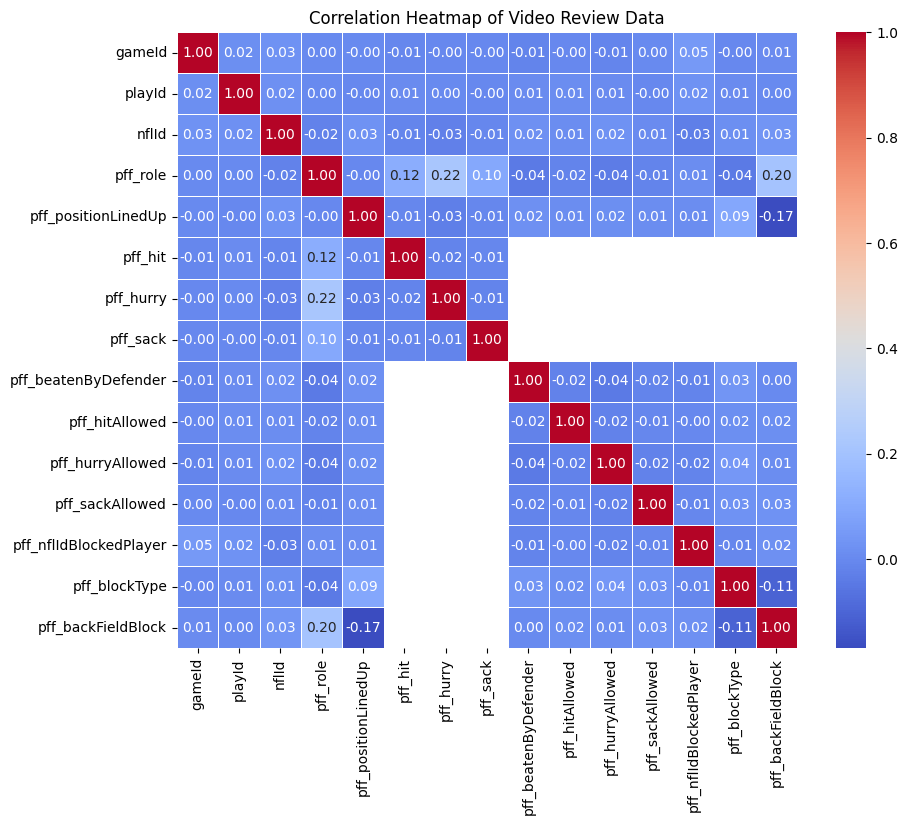

In [88]:
# Heatmap for pffScoutingData
label_encoders = {}
for col in df_pff.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_pff[col] = le.fit_transform(df_pff[col])
    label_encoders[col] = le

corr = df_pff.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Video Review Data")
plt.show()

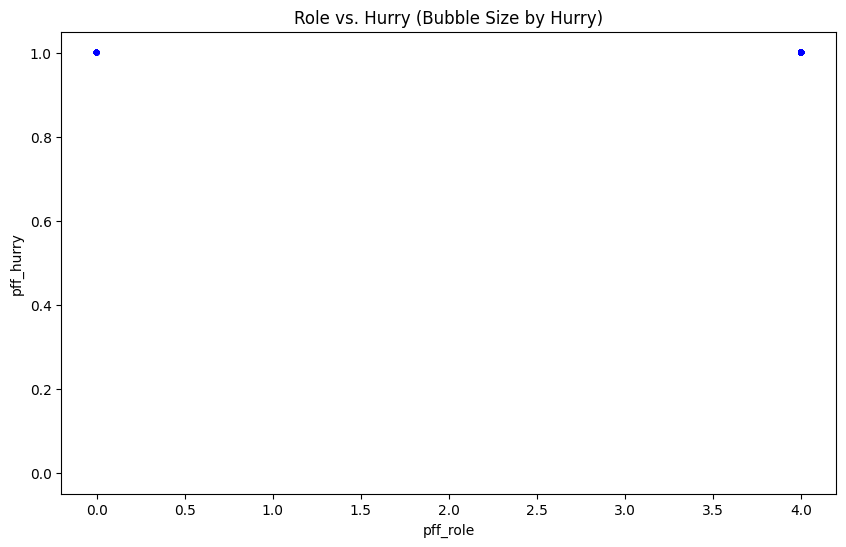

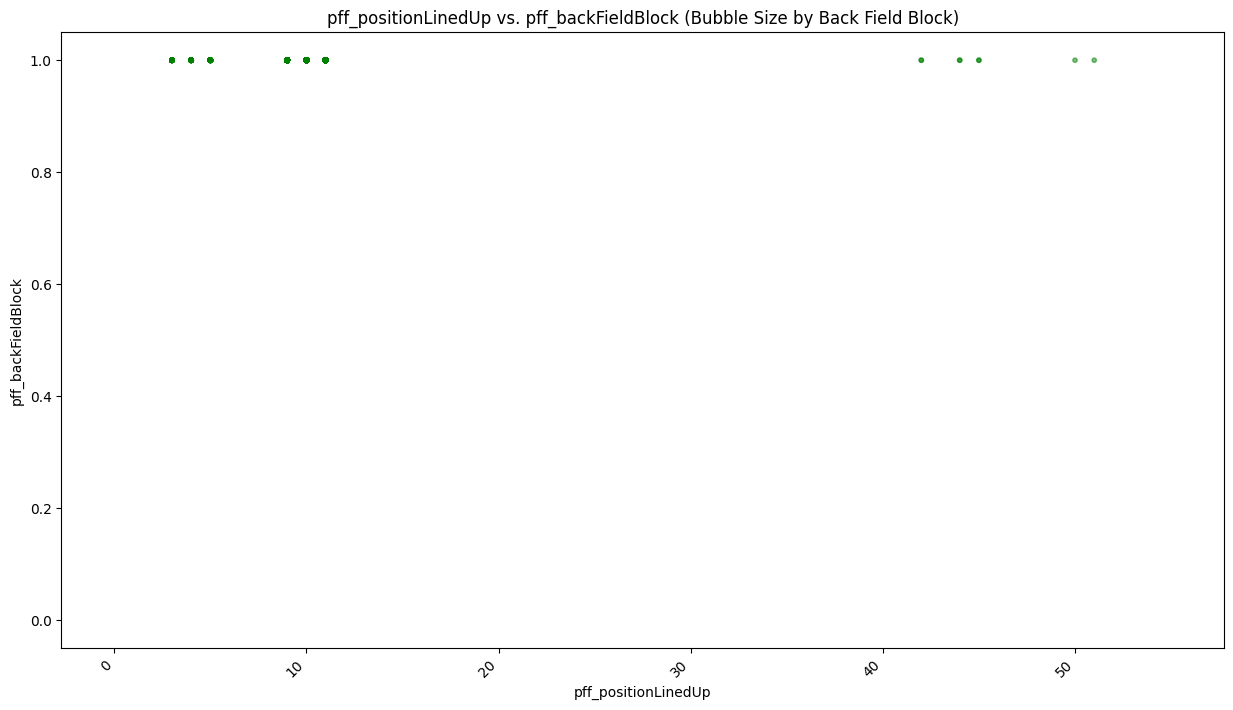

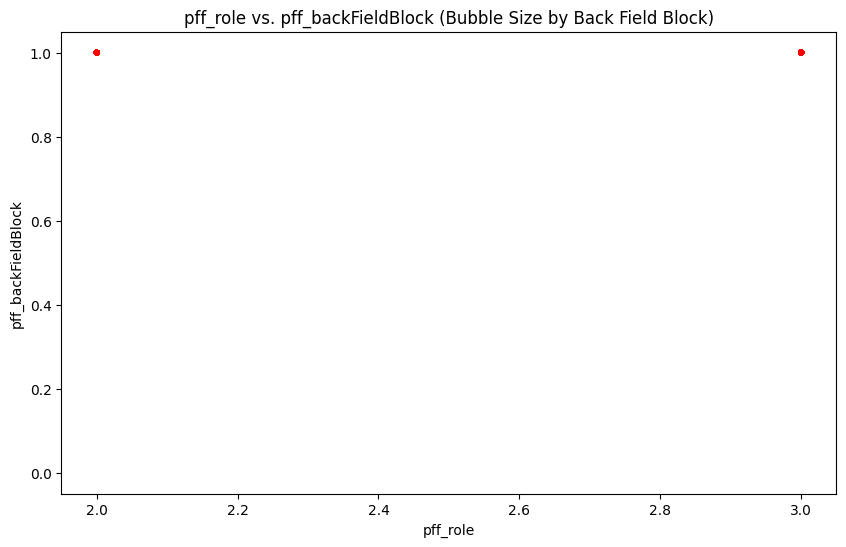

In [89]:
# Bubble Plot for pffScoutingData

# 1. Role vs. Hurry (Bubble size by pff_hurry)
plt.figure(figsize=(10, 6))
plt.scatter(df_pff['pff_role'], df_pff['pff_hurry'], 
            s=df_pff['pff_hurry'] * 10, alpha=0.5, color='blue') 
plt.title('Role vs. Hurry (Bubble Size by Hurry)')
plt.xlabel('pff_role')
plt.ylabel('pff_hurry')
plt.show()

# 2. Position Lined Up vs. Back Field Block (Bubble size by pff_backFieldBlock)
plt.figure(figsize=(15, 8))
plt.scatter(df_pff['pff_positionLinedUp'], df_pff['pff_backFieldBlock'], 
            s=df_pff['pff_backFieldBlock'] * 10, alpha=0.5, color='green') 
plt.title('pff_positionLinedUp vs. pff_backFieldBlock (Bubble Size by Back Field Block)')
plt.xlabel('pff_positionLinedUp')
plt.ylabel('pff_backFieldBlock')
plt.xticks(rotation=45, ha='right') 
plt.show()

# 3. Role vs. Back Field Block (Bubble size by pff_backFieldBlock)
plt.figure(figsize=(10, 6))
plt.scatter(df_pff['pff_role'], df_pff['pff_backFieldBlock'], 
            s=df_pff['pff_backFieldBlock'] * 10, alpha=0.5, color='red')  
plt.title('pff_role vs. pff_backFieldBlock (Bubble Size by Back Field Block)')
plt.xlabel('pff_role')
plt.ylabel('pff_backFieldBlock')
plt.show()


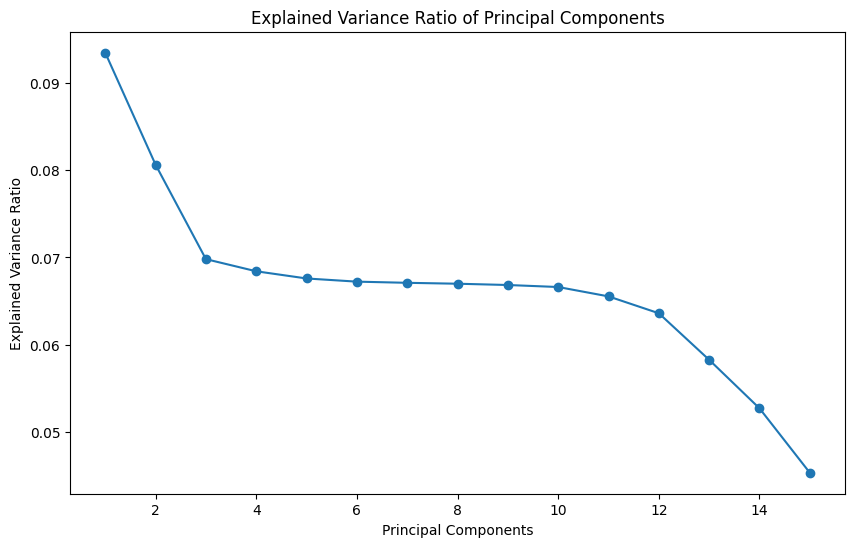

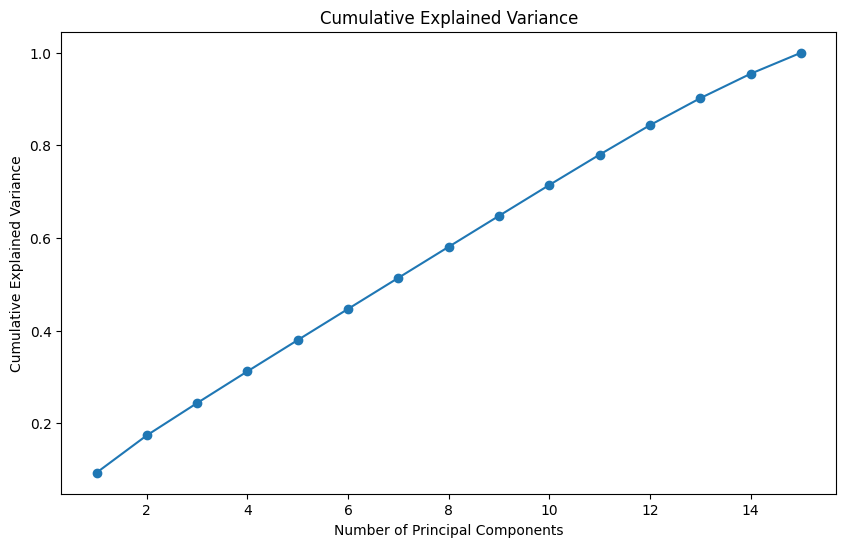

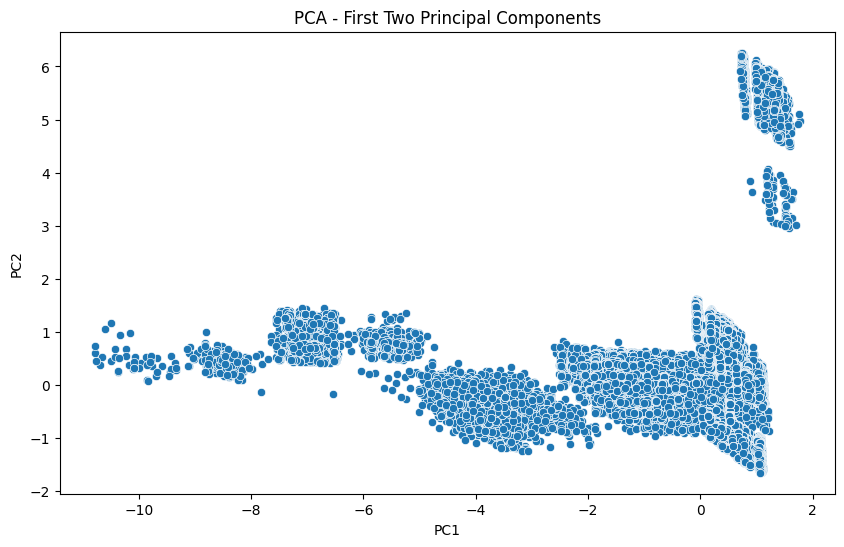

In [90]:
# Principal Component Analysis for pffScoutingData
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_pff_numeric = df_pff.select_dtypes(include=['float64', 'int64'])

imputer = SimpleImputer(strategy='median')
df_pff_numeric_imputed = imputer.fit_transform(df_pff_numeric)

scaler = StandardScaler()
df_scaled_pff = scaler.fit_transform(df_pff_numeric_imputed)

pca_pff = PCA()
pca_pff.fit(df_scaled_pff)

explained_variance_pff = pca_pff.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_pff) + 1), explained_variance_pff, marker='o')
plt.title('Explained Variance Ratio of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

cumulative_explained_variance_pff = explained_variance_pff.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance_pff) + 1), cumulative_explained_variance_pff, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

pca_components_pff = pca_pff.transform(df_scaled_pff)

df_pff_pca = pd.DataFrame(data=pca_components_pff, columns=[f'PC{i+1}' for i in range(pca_components_pff.shape[1])])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pff_pca['PC1'], y=df_pff_pca['PC2'])
plt.title('PCA - First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



In [91]:
# Linear regression analysis using different sets of features for pffScoutingData

def linear_regression_analysis(X, y, feature_set_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Linear Regression Model ({feature_set_name}):")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")
    print('-' * 40)

df_pff_filled_median = df_pff.fillna(df_pff.median())


# Set 1: 'pff_role' vs 'pff_hurry'
X1 = df_pff_filled_median[['pff_role']]  
y1 = df_pff_filled_median['pff_hurry']   
linear_regression_analysis(X1, y1, "pff_role vs pff_hurry")

# Set 2: 'pff_positionLinedUp' vs 'pff_backFieldBlock'
X2 = df_pff_filled_median[['pff_positionLinedUp']] 
y2 = df_pff_filled_median['pff_backFieldBlock']    
linear_regression_analysis(X2, y2, "pff_positionLinedUp vs pff_backFieldBlock")

# Set 3: 'pff_role', 'pff_backFieldBlock'
X3 = df_pff_filled_median[['pff_role']] 
y3 = df_pff_filled_median['pff_backFieldBlock']   
linear_regression_analysis(X3, y3, "pff_role vs pff_backFieldBlock")


Linear Regression Model (pff_role vs pff_hurry):
MAE: 0.0357
MSE: 0.0144
R²: 0.0277
----------------------------------------
Linear Regression Model (pff_positionLinedUp vs pff_backFieldBlock):
MAE: 0.0226
MSE: 0.0103
R²: 0.0105
----------------------------------------
Linear Regression Model (pff_role vs pff_backFieldBlock):
MAE: 0.0210
MSE: 0.0104
R²: 0.0005
----------------------------------------


Conclusions for pffScoutingData Dataset:

*Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data! Do you see any outliers? (Data points that are far from the rest of the data). Perform Principal Component Analysis to find out the directions in which the data varies. Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps? Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture? Which features seem most likely to be useful to predict other features?*

I would say the data still is usable for analysis and can offer great insights into the objective at play. In the scatterplot of PC1 vs PC2, the data is not very spread out and we can see multiple groups clustered together across the graph. There are no large outliers at play but there are a few data points (specifically at about [-7, -0.1] and [-6.1, -0.1]) that are not clearly in one of the clustered groups and could technically be outliers. According to the graphs, at 12 principal components we are able to capture about 80% of the cumulative varience in the dataset. This tells me that the first 12 components together explain 80% of the variability in the data. However, it also means that the remaining 20% of variance is spread out across the other components (PC13, PC14, etc.). PC1 alone would not account for a lot of the variance in the data since it requires 12 components to reach 80%. Therefore, we would be missing a large amount of data and not have an accurate analysis. Based on the linear regression analysis, it appears none of these features are great at predicting the others. The highest R² value is pff_role vs pff_hurry is 0.0277 which is a very small number.  


In [92]:
# Dataset 3: InjuryRecord
file_path = 'InjuryRecord.csv'
df_injury = pd.read_csv(file_path)

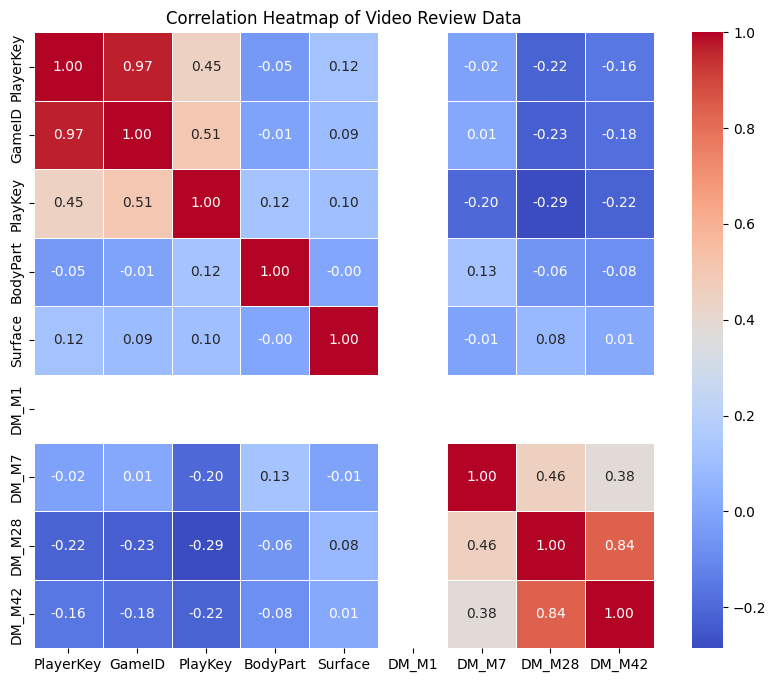

In [93]:
# Heatmap for InjuryRecord
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
label_encoders = {}
for col in df_injury.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_injury[col] = le.fit_transform(df_injury[col])
    label_encoders[col] = le

corr = df_injury.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Video Review Data")
plt.show()


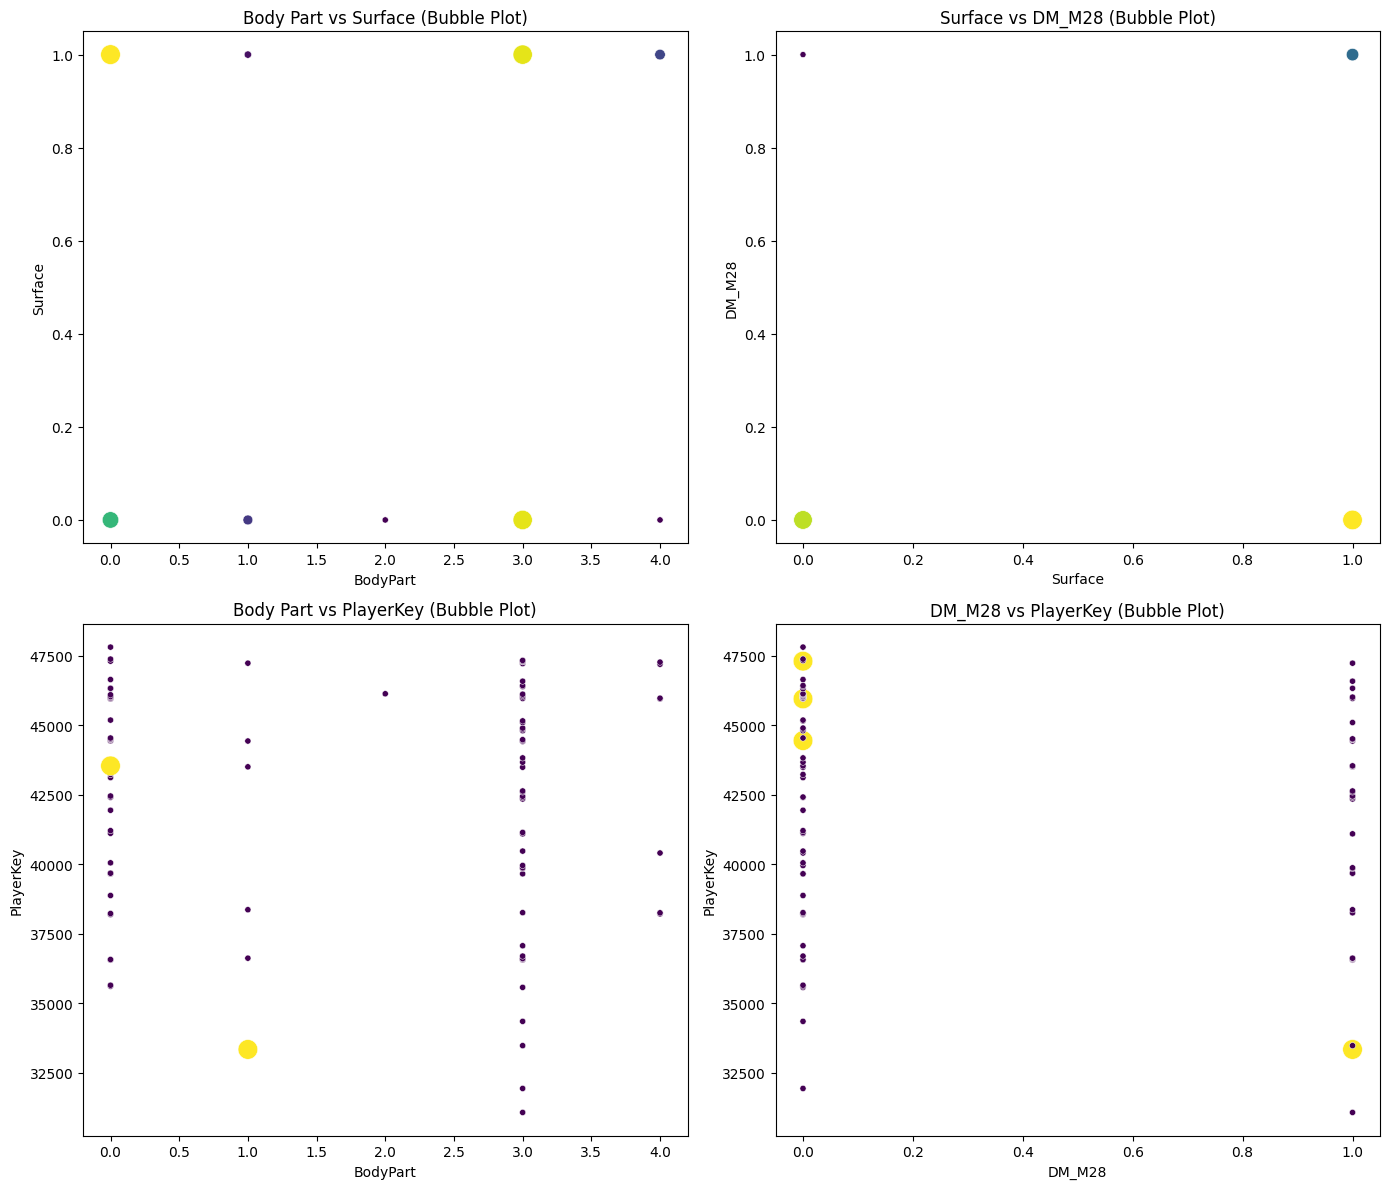

In [94]:
# Bubble Plot for InjuryRecord

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# 1. Body Part vs Surface
bubble_data_1 = df_injury.groupby(['BodyPart', 'Surface']).size().reset_index(name='count')
sns.scatterplot(x='BodyPart', y='Surface', size='count', data=bubble_data_1, sizes=(20, 200), legend=None, hue='count', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Body Part vs Surface (Bubble Plot)')
axs[0, 0].set_xlabel('BodyPart')
axs[0, 0].set_ylabel('Surface')

# 2. Surface vs DM_M28
bubble_data_2 = df_injury.groupby(['Surface', 'DM_M28']).size().reset_index(name='count')
sns.scatterplot(x='Surface', y='DM_M28', size='count', data=bubble_data_2, sizes=(20, 200), legend=None, hue='count', palette='viridis', ax=axs[0, 1])
axs[0, 1].set_title('Surface vs DM_M28 (Bubble Plot)')
axs[0, 1].set_xlabel('Surface')
axs[0, 1].set_ylabel('DM_M28')

# 3. Body Part vs PlayerKey
bubble_data_3 = df_injury.groupby(['BodyPart', 'PlayerKey']).size().reset_index(name='count')
sns.scatterplot(x='BodyPart', y='PlayerKey', size='count', data=bubble_data_3, sizes=(20, 200), legend=None, hue='count', palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Body Part vs PlayerKey (Bubble Plot)')
axs[1, 0].set_xlabel('BodyPart')
axs[1, 0].set_ylabel('PlayerKey')

# 4. DM_M28 vs PlayerKey
bubble_data_4 = df_injury.groupby(['DM_M28', 'PlayerKey']).size().reset_index(name='count')
sns.scatterplot(x='DM_M28', y='PlayerKey', size='count', data=bubble_data_4, sizes=(20, 200), legend=None, hue='count', palette='viridis', ax=axs[1, 1])
axs[1, 1].set_title('DM_M28 vs PlayerKey (Bubble Plot)')
axs[1, 1].set_xlabel('DM_M28')
axs[1, 1].set_ylabel('PlayerKey')

plt.tight_layout()
plt.show()


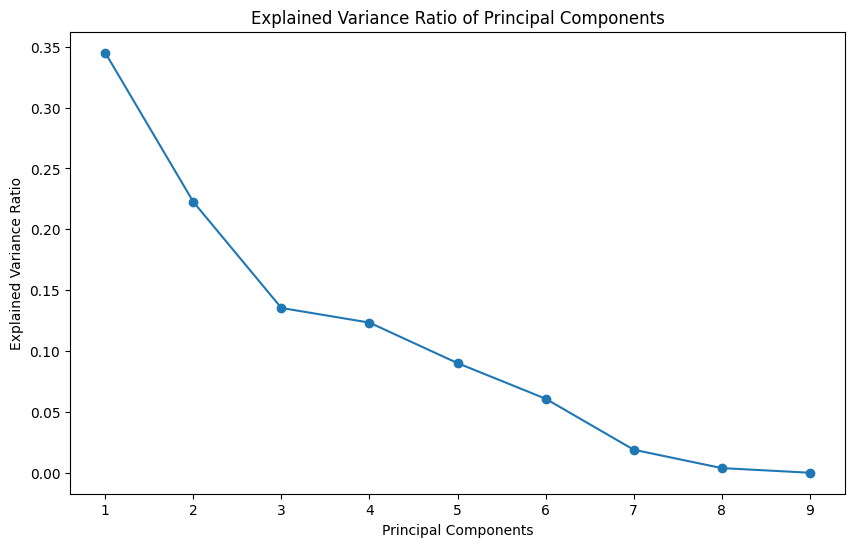

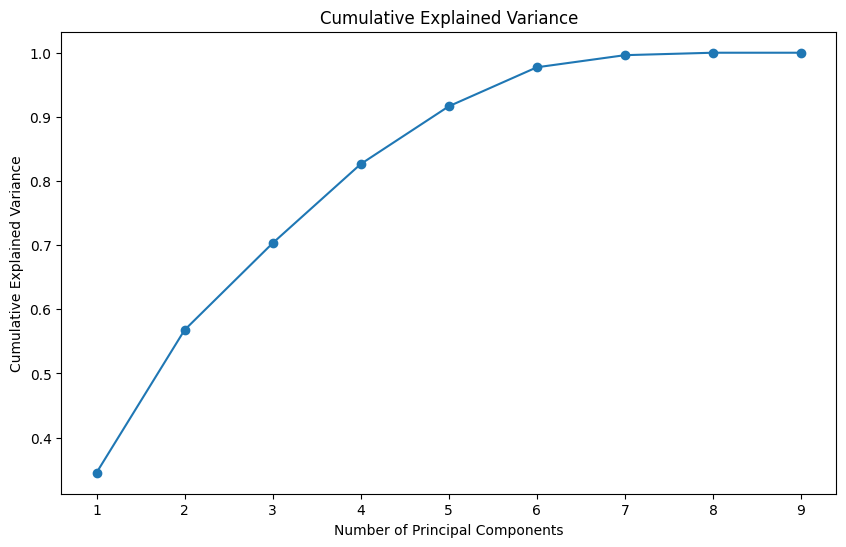

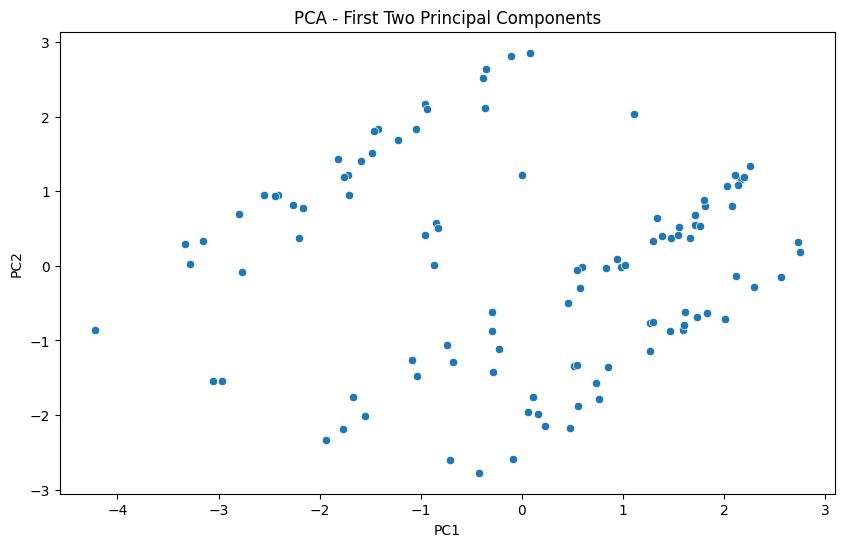

In [95]:
# Principal Component Analysis for InjuryRecord
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

df_injury_numeric = df_injury.select_dtypes(include=['float64', 'int64'])

imputer = SimpleImputer(strategy='median')
df_injury_numeric_imputed = imputer.fit_transform(df_injury_numeric)

scaler = StandardScaler()
df_scaled_injury = scaler.fit_transform(df_injury_numeric_imputed)

pca_injury = PCA()

pca_injury.fit(df_scaled_injury)

explained_variance_injury = pca_injury.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_injury) + 1), explained_variance_injury, marker='o')
plt.title('Explained Variance Ratio of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

cumulative_explained_variance_injury = explained_variance_injury.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance_injury) + 1), cumulative_explained_variance_injury, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


pca_components_injury = pca_injury.transform(df_scaled_injury)

df_injury_pca = pd.DataFrame(data=pca_components_injury, columns=[f'PC{i+1}' for i in range(pca_components_injury.shape[1])])


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_injury_pca['PC1'], y=df_injury_pca['PC2'])
plt.title('PCA - First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [96]:
# Linear regression analysis using different sets of features for InjuryRecord

def linear_regression_analysis(X, y, feature_set_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Linear Regression Model ({feature_set_name}):")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")
    print('-' * 40)

df_injury_filled_median = df_injury.fillna(df_injury.median())


# Set 1: Body Part vs Surface
X1 = df_injury_filled_median[['BodyPart']]  
y1 = df_injury_filled_median['Surface']   
linear_regression_analysis(X1, y1, "BodyPart vs Surface")

# Set 2: Surface vs DM_M28
X2 = df_injury_filled_median[['Surface']] 
y2 = df_injury_filled_median['DM_M28']    
linear_regression_analysis(X2, y2, "Surface vs DM_M28")

# Set 3: BodyPart, 'PlayerKey'
X3 = df_injury_filled_median[['BodyPart']] 
y3 = df_injury_filled_median['PlayerKey']   
linear_regression_analysis(X3, y3, "BodyPart vs PlayerKey")

# Set 4: DM_M28, PlayerKey
X4 = df_injury_filled_median[['DM_M28']] 
y4 = df_injury_filled_median['PlayerKey']   
linear_regression_analysis(X4, y4, "DM_M28 vs PlayerKey")

Linear Regression Model (BodyPart vs Surface):
MAE: 0.4960
MSE: 0.2475
R²: -0.0104
----------------------------------------
Linear Regression Model (Surface vs DM_M28):
MAE: 0.4896
MSE: 0.2719
R²: -0.0901
----------------------------------------
Linear Regression Model (BodyPart vs PlayerKey):
MAE: 3345.4131
MSE: 16704543.2317
R²: -0.0367
----------------------------------------
Linear Regression Model (DM_M28 vs PlayerKey):
MAE: 3405.0401
MSE: 15630854.6676
R²: 0.0299
----------------------------------------


Conclusions for Injury_Record Dataset:

*Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data! Do you see any outliers? (Data points that are far from the rest of the data). Perform Principal Component Analysis to find out the directions in which the data varies. Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps? Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture? Which features seem most likely to be useful to predict other features?*

I would say the data still is usable for analysis and can offer great insights into the objective at play. In the scatterplot of PC1 vs PC2, the data almost forms 4 diagonal lines across the graph, going from the bottom left to the top right. I would say there is one outlier seen at about (-4.5, -0.9). According to the graphs, at 3 principal components we are able to capture about 70% of the explained varience in the dataset. This tells me that the first 3 components together explain 70% of the variability in the data. However, it also means that the remaining 30% of variance is spread out across the other components (PC4, PC5, etc.). PC1 alone might explain a portion of the variance, but we will also be missing a large amount of data and not have an accurate analysis. Based on the linear regression analysis, it appears none of these features are great at predicting the others. The highest R² value is DM_M28 vs PlayerKey is 0.0299 which is a very small number. The rest of the values were negative indictating a poor prediction.



# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

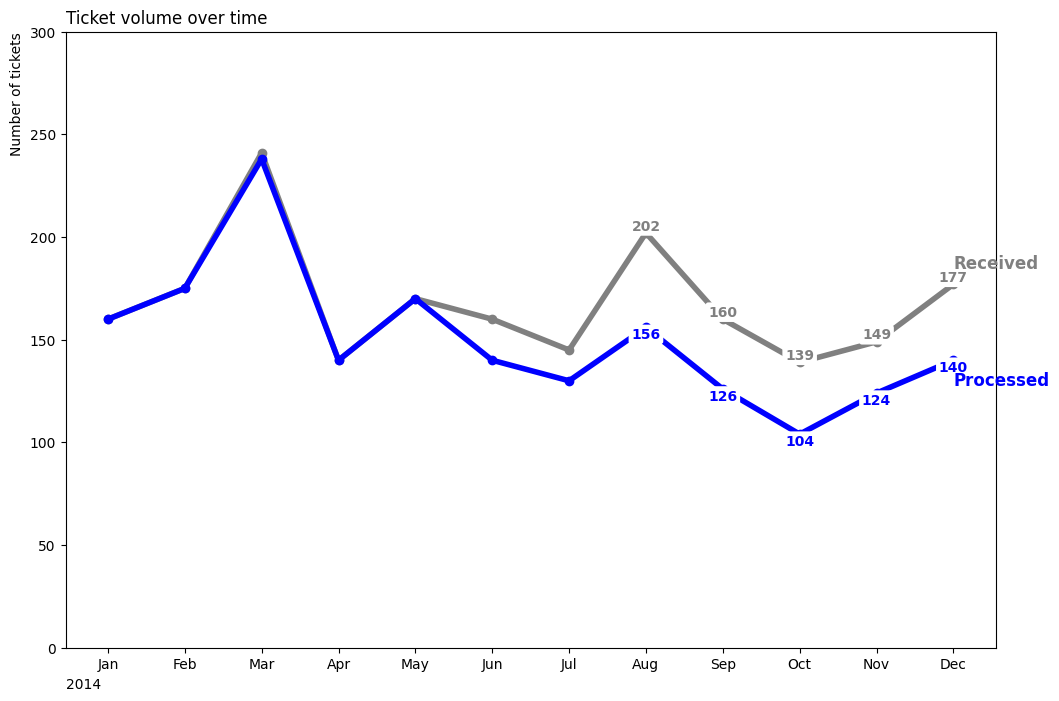

In [97]:
import matplotlib.pyplot as plt

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received_tickets = [160, 175, 241, 140, 170, 160, 145, 202, 160, 139, 149, 177]
processed_tickets = [160, 175, 238, 140, 170, 140, 130, 156, 126, 104, 124, 140]

plt.figure(figsize=(12, 8))
plt.plot(months, received_tickets, color='grey', label='Received', marker='o', linewidth=4)
plt.plot(months, processed_tickets, color='blue', label='Processed', marker='o', linewidth=4)

plt.title('Ticket volume over time', loc='left')
plt.xlabel('2014', loc='left')
plt.ylabel('Number of tickets', loc='top')
plt.ylim(0, 300) 
plt.yticks(range(0, 301, 50))  

plt.xticks(months)

for i in range(7, 12):  
    plt.text(months[i], received_tickets[i], str(received_tickets[i]), color='grey', ha='center', va='bottom', fontweight='bold', fontsize=10, 
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))
    plt.text(months[i], processed_tickets[i], str(processed_tickets[i]), color='blue', ha='center', va='top', fontweight='bold', fontsize=10, 
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2'))

plt.text('Dec', received_tickets[11] + 10, 'Received', color='grey', ha='left', va='center', fontsize=12, fontweight='bold')
plt.text('Dec', processed_tickets[11] - 10, 'Processed', color='blue', ha='left', va='center', fontsize=12, fontweight='bold')
plt.grid(False)
plt.tight_layout
plt.show()
